**Brian Blaylock**  
*July 20, 2021*

# HRRR-Alaska Data

There are different products available on the cloud.

In [1]:
from herbie.archive import Herbie
from toolbox.cartopy_tools import common_features, pc
from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [6]:
H = Herbie('2021-07-19', 
           model='hrrrak', 
           product='sfc')

🏋🏻‍♂️ Found 2021-Jul-19 00:00 UTC F00 [HRRRAK] [product=sfc] GRIB2 file from aws and index file from aws.                                                                                                                                                       


In [3]:
x = H.xarray('TMP:2 m above')

📇 Download subset: [HRRRAK] model [sfc] product run at 2021-Jul-19 00:00 UTC F00                                                            
 cURL from https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210719/alaska/hrrr.t00z.wrfsfcf00.ak.grib2
   1: GRIB_message=76  TMP:2 m above ground:anl


/p/home/blaylock/anaconda3/envs/basic38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


Text(0.0, 1.0, 'HRRRAK: 2D surface level fields; 3-km resolution')

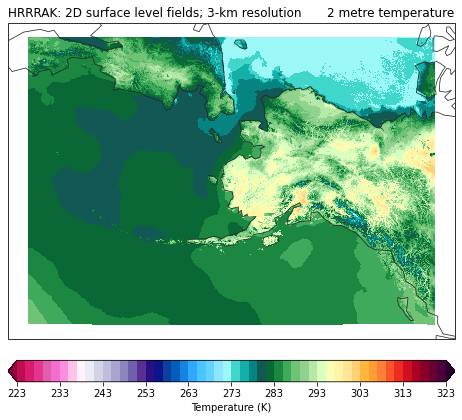

In [4]:
ax = common_features(crs=x.herbie.crs, figsize=[8,8])
p = ax.pcolormesh(x.longitude, x.latitude, x.t2m, 
              transform=pc, 
              **cm_tmp(units='K').cmap_kwargs)
plt.colorbar(p, ax=ax, 
             orientation='horizontal', pad=.05,
             **cm_tmp(units='K').cbar_kwargs)

ax.set_title(x.t2m.GRIB_name, loc='right')
ax.set_title(f"{x.model.upper()}: {H.product_description}", loc='left')